In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin_Cancer',
                      target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',
                      subset='training')

Found 1017 images belonging to 2 classes.


In [8]:
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin_Cancer',target_size=(IMG_SIZE ,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')

Found 254 images belonging to 2 classes.


In [9]:
model = keras.Sequential([ layers.Conv2D(32, (3, 3), activation='relu',
        input_shape=(IMG_SIZE, IMG_SIZE, 3)), layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
        layers.Flatten(), layers.Dense(128, activation='relu'), layers.Dense(1, activation='sigmoid')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 428s 13s/step - accuracy: 0.6508 - loss: 1.4930 - val_accuracy: 0.7047 - val_loss: 0.6102
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.6995 - loss: 0.6198 - val_accuracy: 0.7047 - val_loss: 0.6125
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.7077 - loss: 0.6246 - val_accuracy: 0.7047 - val_loss: 0.6109
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.6713 - loss: 0.6365 - val_accuracy: 0.7047 - val_loss: 0.6081
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.7149 - loss: 0.6024 - val_accuracy: 0.7047 - val_loss: 0.6179


In [14]:
model.save('/content/drive/MyDrive/Skin_Cancer/Skin.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Skin_Cancer/Skin.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


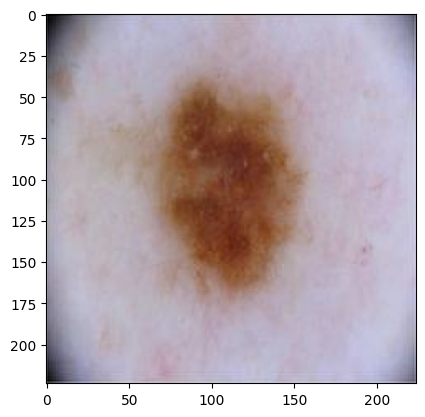

In [16]:
test_image_path="/content/drive/MyDrive/Skin_Cancer/test/Benign/ISIC_0000015.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [17]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

prediction=model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[[0.6321891]]


In [18]:
if prediction >= 0.5:
  print("Cancerous.")
else:
  print("Non-Cancerous.")

Cancerous.
